In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='unicode_escape')
df_train.head()


,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [ ]:

df_test = pd.read_csv('/content/drive/MyDrive/test.csv', encoding= 'unicode_escape')
df_test.head()


,Unnamed: 0,comment,Label
0,0,arkadaslar film bence cok güzel su anda gidile...,1
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0


In [ ]:

def pre_processing(text):
    text = text.lower()
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text)
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    return text


In [ ]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [ ]:
df_train.head()

,Unnamed: 0,comment,Label,clean_text
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0,bana filmde benim anlamadigim bisey oldugunu s...
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1,çocuklar ilk filmin sonunda büyüdüler filmde b...
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0,film biraz uzun sürse harbi kiyameti görecektik
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0,pek orjinal bi cinayet yok orjinal oyuncular v...
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1,film tek kelimeyle muhtesemdi heleki sonundaki...


In [ ]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (7996,)
x_test (2666,)
y_train (7996,)
y_test (2666,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression())])

LogisticRegression .fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1333
           1       0.90      0.88      0.89      1333

    accuracy                           0.89      2666
   macro avg       0.89      0.89      0.89      2666
weighted avg       0.89      0.89      0.89      2666

Train Accuracy : 0.952
Test Accuracy : 0.890
0.8902347849193588 : is the precision score
0.8900975243810954 : is the recall score
0.8900878593024191 : is the f1 score


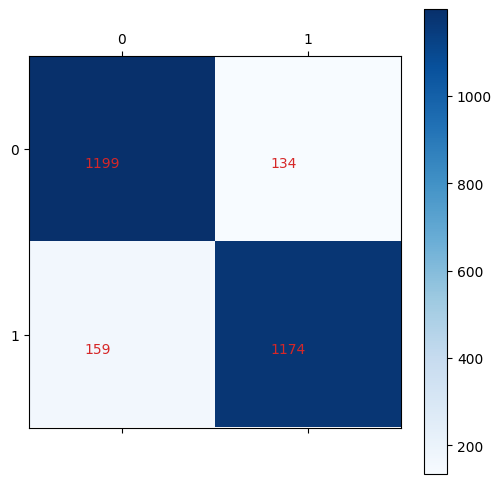

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(LogisticRegression, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

result = LogisticRegression.predict(X_test)
cr = classification_report(y_test, result)
print(cr)


print('Train Accuracy : %.3f'%LogisticRegression.score(X_train, y_train))
print('Test Accuracy : %.3f'%LogisticRegression.score(X_test, y_test))



y_pred = LogisticRegression.predict(X_test)
print(precision_score(y_test, y_pred ,average='macro') , ": is the precision score")
print(recall_score(y_test, y_pred,average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred ,average='macro'), ": is the f1 score")

plot_confusion_matrix(y_test, LogisticRegression.predict(X_test))

In [ ]:

!pip install requests
!pip install html5lib
!pip install bs4
!pip install selenium
!pip install pandas tabulate prettytable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://hdfilmcehennemi.cx/titanik-izle/"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html.parser')

# Yorumların bulunduğu div etiketlerini bulma
comment_divs = soup.find_all("div", {"class": "comment-body"})

# Yorum metinlerini çekme
comment_list = []
for comment_div in comment_divs:
    p_tag = comment_div.find("p")
    if p_tag:
        comment_list.append(p_tag.text.strip())

# Yorumları yazdırma
if comment_list:
    for idx, comment in enumerate(comment_list):
        print(f"Comment {idx+1}: {comment}")
else:
    print("No comments found")

# Belirli bir yorumu yazdırma
try:
    print(comment_list[3])
except IndexError:
    print("There are less than 4 comments")

Comment 1: Çok duygusal ve güzeldi 🥺❤️



68



13
Comment 2: Çok duygusal ve güzeldi 🥺❤️
Comment 3: tamam
Comment 4: Super bi film defalarca izledim
Comment 5: Gayet güzel bir film çok beğendim herkese tavsiye ederim
Comment 6: Başarılı bir film  defalarca izlemeye değer tebrik ederim
Comment 7: Çöl beğendim herkese tavsiye ederim gayet güzel
Comment 8: Çok beğendim gayet güzel herkese tavsiye ederim bu film harika dostum
Comment 9: Filmi nasıl indirebilirim?
Comment 10: 31:20 dk sinda bilgisayar animasyonu yapılmış
Comment 11: Ağlamak üzereyim yıllar sonra ağlayamam 😔
Comment 12: cok guzel kac yıl gecerse gecsin  ızlemeye deger efsane duygusal huzur sevgı  dram   olarak cok guzel  ılk ızlemede chek batmasına hıc bu kadar uzulmemıstım 14 defa ızledım  her ızlememde  uzulup duygusalasıp   aglıyorum  herkese mutlaka tavsıye ederım ızlenmesı gereken flm
Comment 13: İzlediğim en güzel film 🥹🫶🏻
Comment 14: Aşırı güzel ve duygusal bir filmdi ;(
Comment 15: Abi resmen içinde idim hahahahaha 

In [ ]:
def analyze_comments(comments, pipeline):
    positive_comments = []
    negative_comments = []

    for comment in comments:
        prediction = pipeline.predict([comment])
        proportion = pipeline.predict_proba([comment])

        if prediction[0] == 1:
            positive_comments.append((comment, proportion[0][1]))
        else:
            negative_comments.append((comment, proportion[0][0]))

    return positive_comments, negative_comments

positive_comments, negative_comments = analyze_comments(comment_list, LogisticRegression)


In [ ]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["Comment", "Sentiment Probability", "Sentiment"]

for comment, sentiment_prob in positive_comments:
    if len(comment) > 50:
        comment = comment[:50] + "..."
    table.add_row([comment, f"{sentiment_prob:.2f}", "Positive"])

for comment, sentiment_prob in negative_comments:
    if len(comment) > 50:
        comment = comment[:50] + "..."
    table.add_row([comment, f"{sentiment_prob:.2f}", "Negative"])


print(table)


+-------------------------------------------------------+-----------------------+-----------+
|                        Comment                        | Sentiment Probability | Sentiment |
+-------------------------------------------------------+-----------------------+-----------+
|              Çok duygusal ve güzeldi 🥺❤️             |          0.89         |  Positive |
|                                                       |                       |           |
|                                                       |                       |           |
|                                                       |                       |           |
|                           68                          |                       |           |
|                                                       |                       |           |
|                                                       |                       |           |
|                                                       |    

Yorum Sentimentlerinin Sayısı:
  Sentiment  Count
0  Positive     27
1  Negative     13


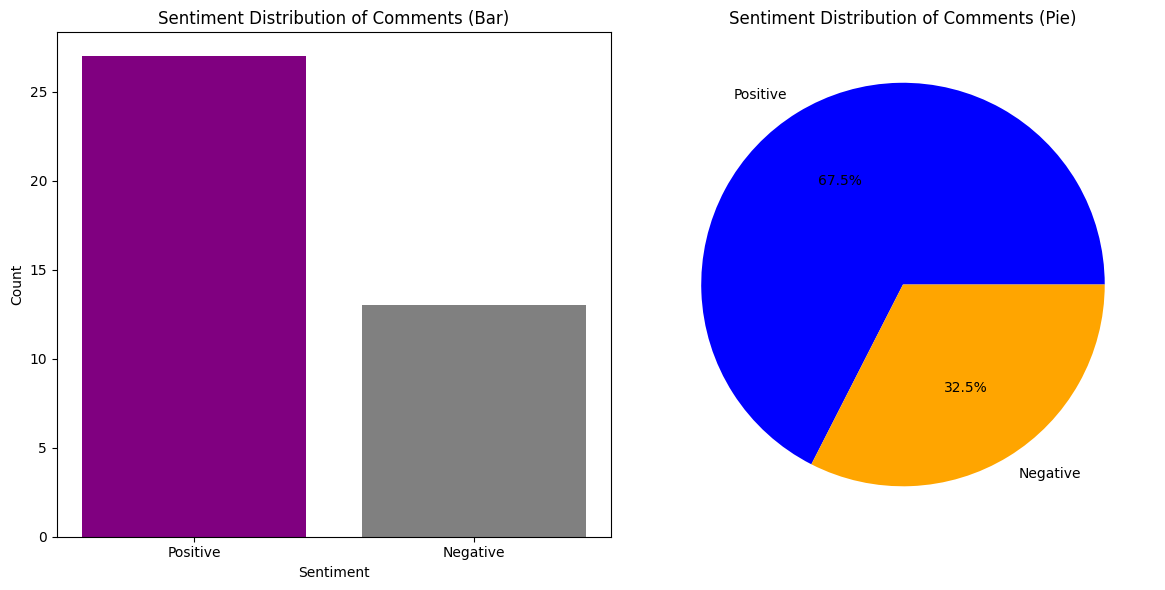

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_comments(comments, pipeline):
    positive_comments = []
    negative_comments = []

    for comment in comments:
        prediction = pipeline.predict([comment])
        proportion = pipeline.predict_proba([comment])

        if prediction[0] == 1:
            positive_comments.append((comment, proportion[0][1]))
        else:
            negative_comments.append((comment, proportion[0][0]))

    return positive_comments, negative_comments

positive_comments, negative_comments = analyze_comments(comment_list, LogisticRegression)

num_positive = len(positive_comments)
num_negative = len(negative_comments)

data = {'Sentiment': ['Positive', 'Negative'],
        'Count': [num_positive, num_negative]}
df = pd.DataFrame(data)

print("Yorum Sentimentlerinin Sayısı:")
print(df)

# Dağılımı gösteren çubuk grafiği ve pasta grafiği
plt.figure(figsize=(12, 6))

# Çubuk grafiği
plt.subplot(1, 2, 1)
plt.bar(df['Sentiment'], df['Count'], color=['purple', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Comments (Bar)')

# Pasta grafiği
plt.subplot(1, 2, 2)
plt.pie(df['Count'], labels=df['Sentiment'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Sentiment Distribution of Comments (Pie)')

plt.tight_layout()
plt.show()


In [ ]:
comment_list = ["comment1", "comment2", "comment3", "comment4", "comment5"]

predictions = [0, 1, 1, 0, 1]

y_test = [0, 1, 0, 0, 1]


correct_predictions = 0
total_predictions = len(comment_list)

for i in range(total_predictions):

    if predictions[i] == y_test[i]:
        correct_predictions += 1

accuracy = (correct_predictions / total_predictions) * 100
print("Başarı Yüzdesi: {:.2f}%".format(accuracy))


Başarı Yüzdesi: 80.00%
